<a href="https://colab.research.google.com/github/jayshivankar/Stats_for_ML/blob/main/Correlation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ignore harmless warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# List of seaborn dataset
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [ ]:
# Import the seaborn data - penguins
data = sns.load_dataset('penguins')

# data dimension
print(f'The data has {data.shape[0]} rows and {data.shape[1]} columns.')

The data has 344 rows and 7 columns.


In [ ]:
# Data sample
data.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [ ]:
# check for null values
# data.isnull().sum()                   # Number of missing values in each columns
round(data.isnull().mean()*100, 2)      # Percentage of missing values in each columns

,0
species,0.00
island,0.00
bill_length_mm,0.58
bill_depth_mm,0.58
flipper_length_mm,0.58
body_mass_g,0.58
sex,3.20


In [ ]:
# Remove the missing values
data.dropna(inplace=True)

# percetage missing values after removing it
round(data.isnull().mean()*100, 2)

,0
species,0.0
island,0.0
bill_length_mm,0.0
bill_depth_mm,0.0
flipper_length_mm,0.0
body_mass_g,0.0
sex,0.0


Correlation Coefficient Value: 0.87


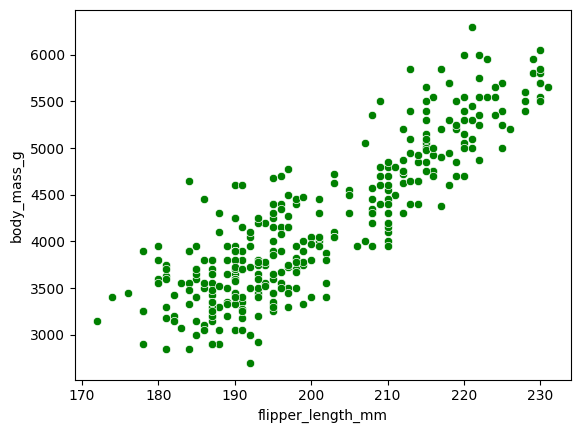

In [ ]:
# what happens to body_mass when the flipper_length increases

# correaltion Coefficient value
# syntax
    # var = data['x'].corr(data['y'])
s_corr = data['flipper_length_mm'].corr(data['body_mass_g'])
print('Correlation Coefficient Value:', round(s_corr,2))

# scatter plot b/w two variables
sns.scatterplot(data=data,
                x = 'flipper_length_mm',
                y = 'body_mass_g', color='g')
plt.show()

In [ ]:
# correlation coefficient for the entire dataframe
round(data.corr(numeric_only=True), 2)

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,1.00,-0.23,0.65,0.59
bill_depth_mm,-0.23,1.00,-0.58,-0.47
flipper_length_mm,0.65,-0.58,1.00,0.87
body_mass_g,0.59,-0.47,0.87,1.00


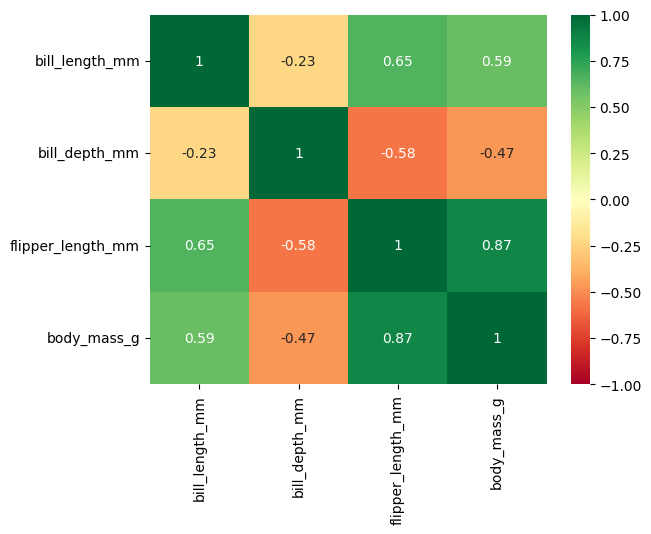

In [ ]:
# Heatmap for easy correlation visual
sns.heatmap(data.corr(numeric_only=True),
            vmin=-1, vmax=1,
            annot=True,
            cmap = 'RdYlGn')        # list of color maps from matplotlib (commentes below)
plt.show()

# # list color maps
# from matplotlib import colormaps
# list(colormaps)

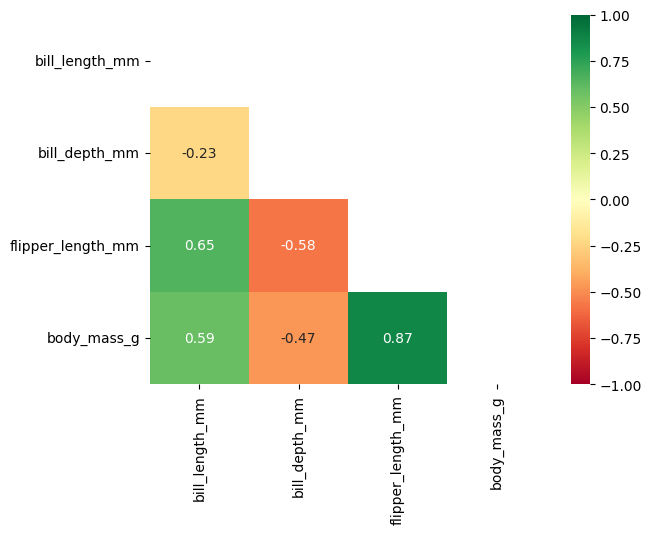

In [ ]:
# Heatmap by masking the duplicates of correlation value

# masking
cor = data.corr(numeric_only=True)
upper = np.triu(cor)         # np.triu: trim upper, np.tril: trim lower

# heatmap
sns.heatmap(cor,
            vmin=-1, vmax=1,
            annot=True,
            cmap = 'RdYlGn',
            mask = upper)
plt.show()

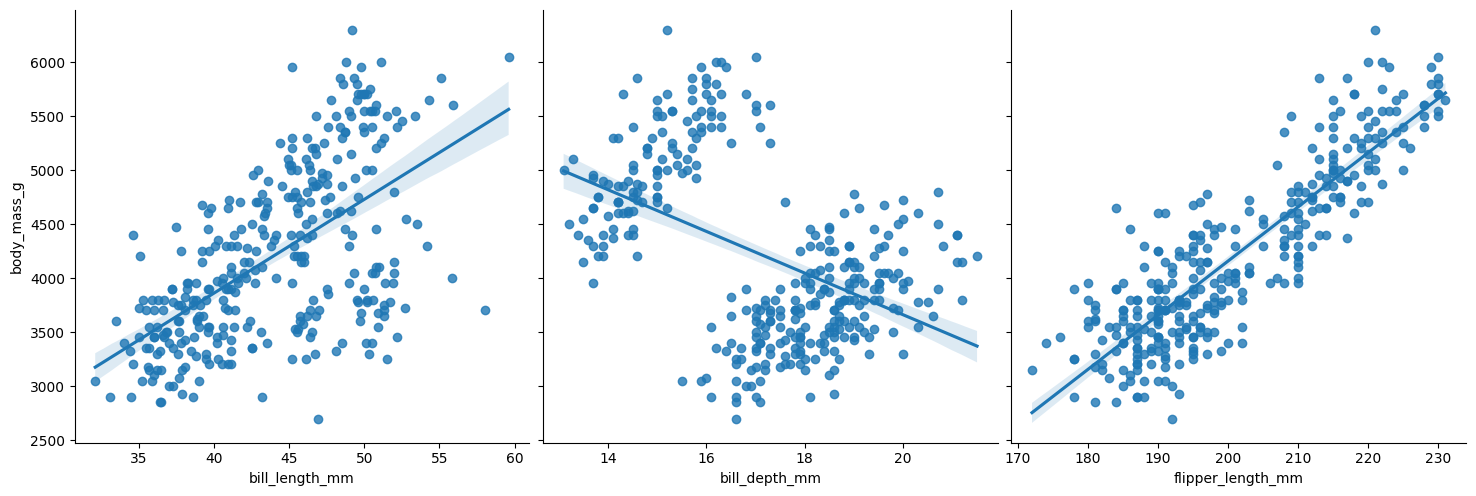

In [ ]:
# What happens to body_mass when other numerical variable increase

# pairplot for easy answering
sns.pairplot(data=data,
             x_vars=['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm'],
             y_vars=['body_mass_g'],
             height=5, aspect=1, kind='reg')     # reg - regression
plt.show()

In [ ]:
# unique list of categorical values
for cols in data.columns:
    if data[cols].dtype == "O":
        print(cols, ':', data[cols].unique())

species : ['Adelie' 'Chinstrap' 'Gentoo']
island : ['Torgersen' 'Biscoe' 'Dream']
sex : ['Male' 'Female']


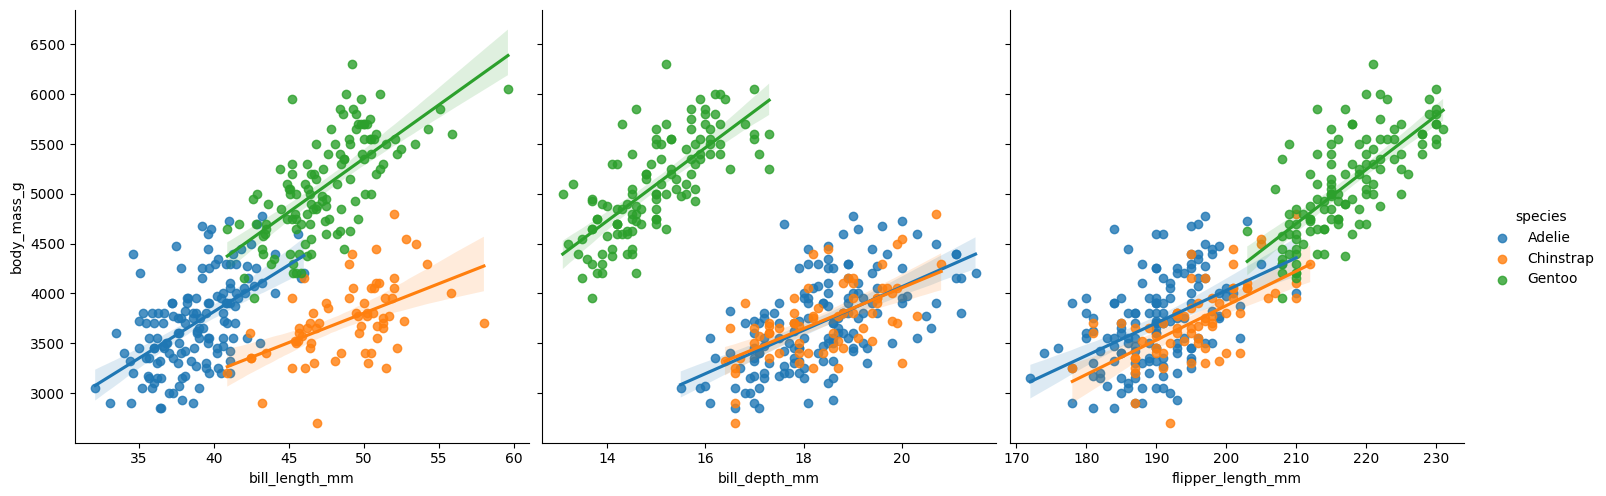

In [ ]:
# What happens to body_mass when other numerical variable increase with hue

# pairplot for easy answering
sns.pairplot(data=data,
             x_vars=['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm'],
             y_vars=['body_mass_g'],
             hue='species',
             height=5, aspect=1, kind='reg')     # reg - regression
plt.show()

In [ ]:
# correlation of each indivdual species for bill_depth and body_mass

print('Overall correlation between bill_depth and body_mass:', round(data['bill_depth_mm'].corr(data['body_mass_g']),2))

for species in data['species'].unique():
    species_df = data[data['species'] == species]
    species_correlation = species_df['bill_depth_mm'].corr(species_df['body_mass_g'])
    print(f'Correlation between bill_depth and body_mass for {species} species:', round(species_correlation,2))

Overall correlation between bill_depth and body_mass: -0.47
Correlation between bill_depth and body_mass for Adelie species: 0.58
Correlation between bill_depth and body_mass for Chinstrap species: 0.6
Correlation between bill_depth and body_mass for Gentoo species: 0.72


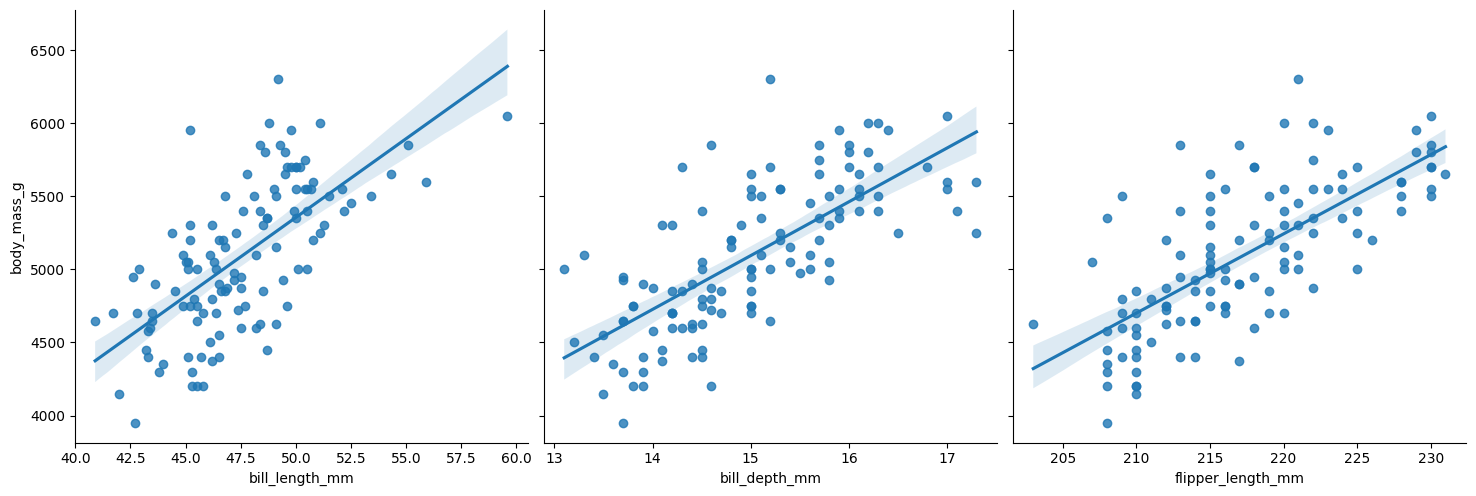

In [ ]:
# THE ABOVE BEHAVIOUR IS CALLED AS SIMPSON'S PARADOX

# understanding body_mass_g against all other numerical features only for gento
sns.pairplot(data=data[data['species']=='Gentoo'],
             x_vars=['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm'],
             y_vars=['body_mass_g'],
             height=5, aspect=1, kind='reg')     # reg - regression
plt.show()

# Homework
    1. body_mass_g against all other numerical features with island as hue
    2. body_mass_g against all other numerical features for species (hue) in Biscoe Island
    3. loops to identify the combination of island and species (island : [species])    

```
# Code Block
tips = sns.load_dataset('tips')
tips.head()
```

    4. Use tips data and find out correlation for all numerical values
    5. Try combination of numerical values with respect to hue
    6. find if there is any Simpson paradox pattern in the tips data

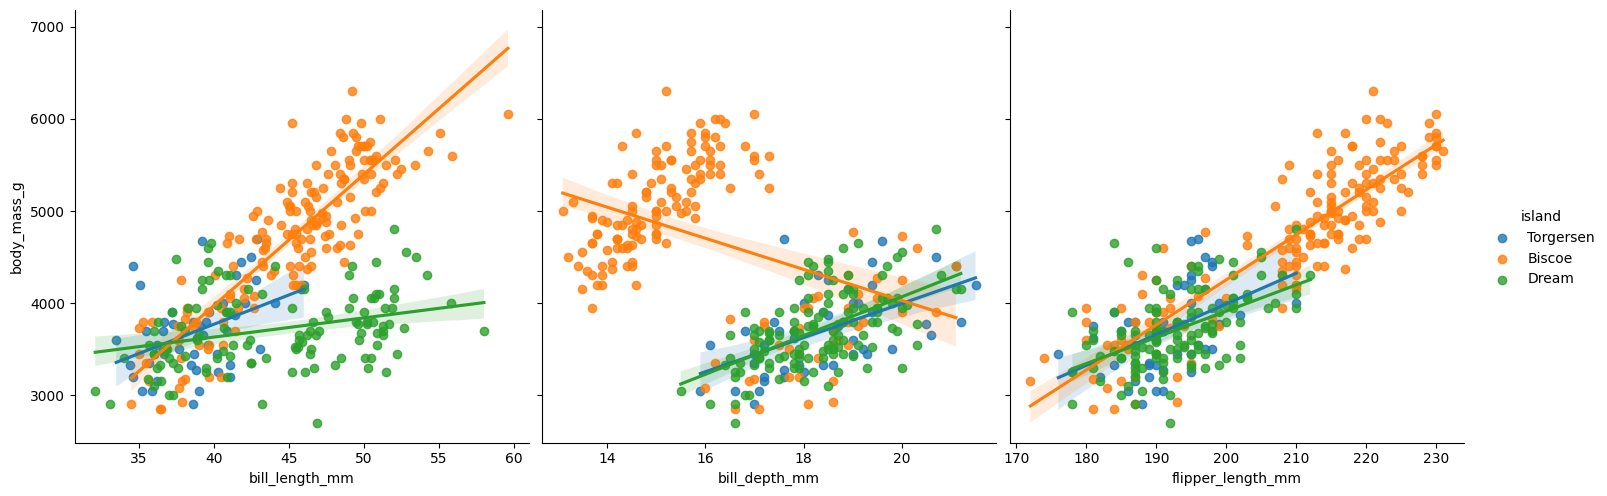

In [ ]:
# 1. body_mass_g against all other numerical features with island as hue

sns.pairplot(data=data,
             x_vars=['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm'],
             y_vars=['body_mass_g'],
             hue='island',
             height=5, aspect=1, kind='reg')     # reg - regression

plt.show()

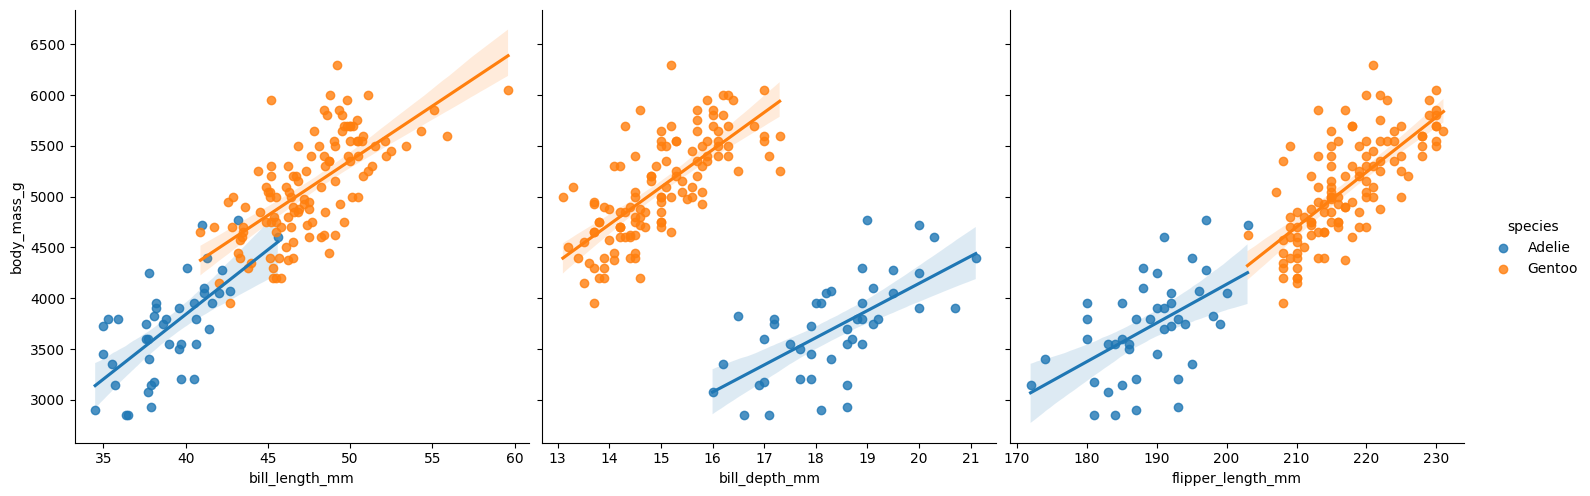

In [ ]:
# 2. body_mass_g against all other numerical features for species (hue) in Biscoe Island

sns.pairplot(data=data[data['island']=='Biscoe'],
             x_vars=['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm'],
             y_vars=['body_mass_g'],
             hue='species',
             height=5, aspect=1, kind='reg')     # reg - regression

plt.show()


In [ ]:
# 3. loops to identify the combination of island and species (island : [species])

for i in data['island'].unique():
    print(i, ':', data[data['island'] == i]['species'].unique())

Torgersen : ['Adelie']
Biscoe : ['Adelie' 'Gentoo']
Dream : ['Adelie' 'Chinstrap']


In [ ]:
# Data load
tips_data = sns.load_dataset('tips')
tips_data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


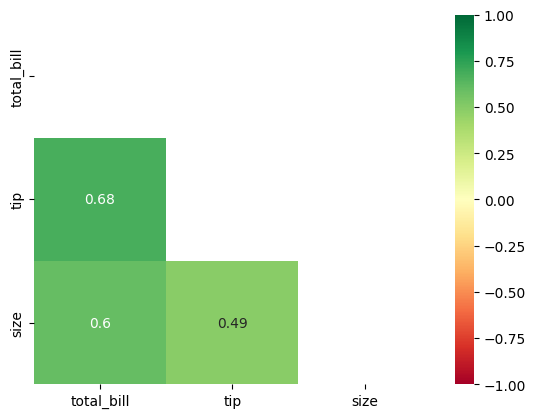

In [ ]:
# 4. Use tips data and find out correlation for all numerical values

sns.heatmap(tips_data.corr(numeric_only=True),
            annot=True,
            vmin=-1, vmax=1,
            cmap='RdYlGn',
            mask=np.triu(tips_data.corr(numeric_only=True)))
plt.show()

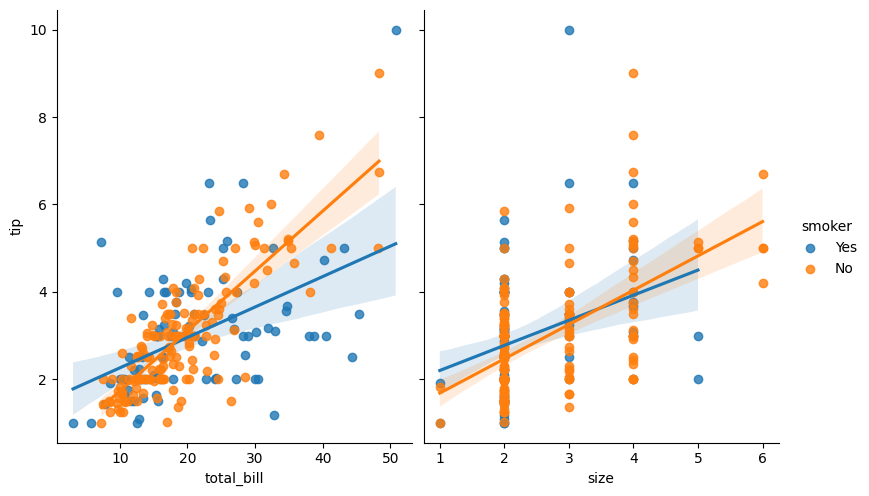

In [ ]:
# 5. Try combination of numerical values with respect to hue

sns.pairplot(tips_data,
             x_vars=['total_bill', 'size'],
             y_vars='tip',
             height=5, aspect=0.8,
             kind='reg',
             hue='smoker')    # sex, day, time

plt.show()

In [ ]:
# 6. find if there is any Simpson paradox pattern in the tips data

## -- No Simpson Paradox